#Agrupamento Hierárquico

Fontes da aula de hoje:
1. https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science/blob/master/08-Clustering-III-hierarchical.ipynb
2. Capítulo 14 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

# Aula Passada

## O Problema de agrupamento

Dada uma coleção de objetos $X = \{x_1, x_2, \dots, x_n\}$, o objetivo é dividir os elementos de $X$ em grupos de forma que:
1. Elementos do mesmo grupo **sejam** "similares"
2. Elementos de grupos diferentes **não sejam** "similares"

Dentro de aprendizado de máquina, o problema de agrupamento está na categoria de **aprendizado não supervisionado**. Essa denominação é dada pois o objetivo é aprender a partir de dados não rotulados.

## $k$-means

### Entrada

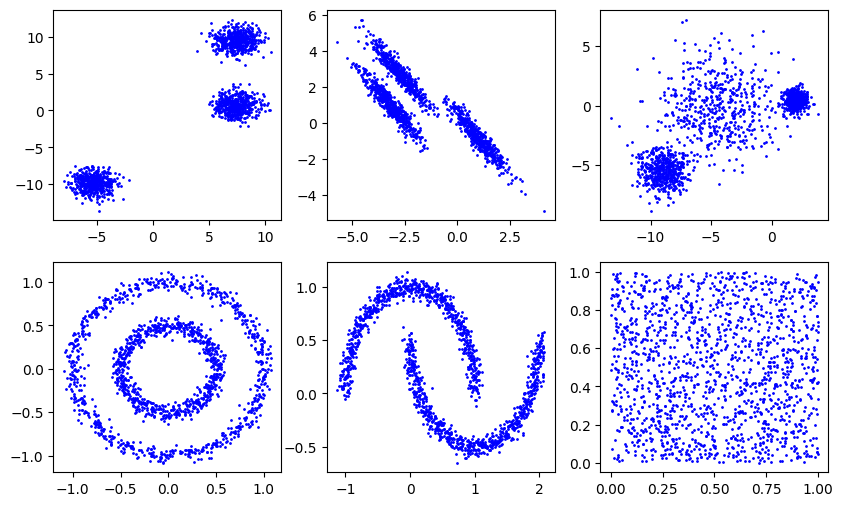

In [ ]:
#@title
import numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
n_samples = 1500

# circles
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5,
                                         noise=.05)

# moons
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)

# blobs
blobs, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)

# no structure
no_structure = np.random.rand(n_samples, 2)

# elipses
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# blobs with varied variances
varied, _ = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

def plot_figure_example(color):
  f, axarr = plt.subplots(2, 3, figsize=(10, 6))
  axarr[0, 0].scatter(blobs[:, 0], blobs[:, 1], s = 1, c = color[0])
  axarr[0, 1].scatter(aniso[:, 0], aniso[:, 1], s = 1, c = color[1])
  axarr[0, 2].scatter(varied[:, 0], varied[:, 1], s = 1, c = color[2])
  axarr[1, 0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], s = 1,
                      c = color[3])
  axarr[1, 1].scatter(noisy_moons[:, 0], noisy_moons[:, 1], s = 1, c = color[4])
  axarr[1, 2].scatter(no_structure[:, 0], no_structure[:, 1], s = 1,
                      c = color[5])

plot_figure_example([["blue"] for _ in range(6)])

### Saída

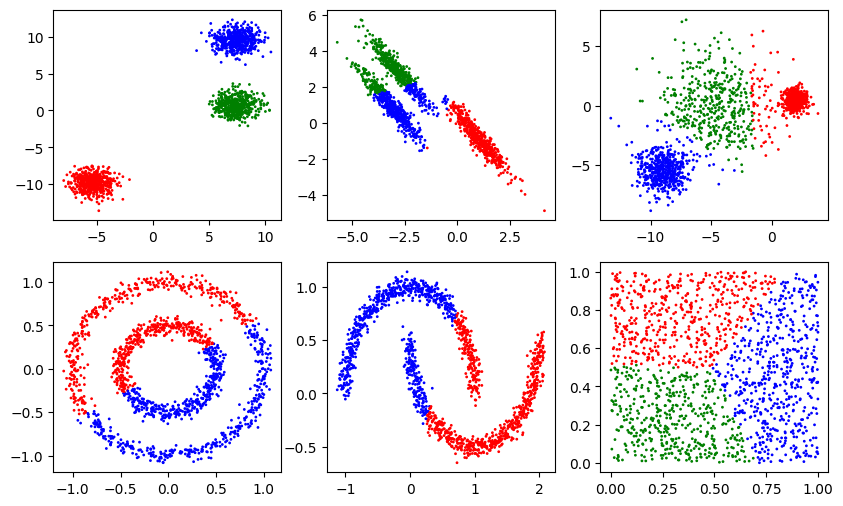

In [ ]:
#@title
def exec_model(dataset, model, params):
  labels = []
  if model == cluster.DBSCAN:
    for idx, param in enumerate(params):
      km = model(eps = param[0], min_samples = param[1])
      km.fit(dataset[idx])
      labels.append(km.labels_)
  elif model == cluster.SpectralClustering:
    for idx, param in enumerate(params):
      km = model(param, affinity='nearest_neighbors')
      km.fit(dataset[idx])
      labels.append(km.labels_)
  elif model == cluster.AgglomerativeClustering:
    params, linkage = params
    for idx, param in enumerate(params):
      km = model(param, linkage = linkage)
      km.fit(dataset[idx])
      labels.append(km.labels_)
  else:
    for idx, param in enumerate(params):
      km = model(param)
      km.fit(dataset[idx])
      labels.append(km.labels_)
  color = "blue red green yellow black purple".split()
  c = []
  for label in labels:
    c.append([color[w] for w in label])
  return c

dataset = [blobs, aniso, varied, noisy_circles, noisy_moons, no_structure]
n_groups = [3, 3, 3, 2, 2, 3]
colors = exec_model(dataset, cluster.KMeans, n_groups)
plot_figure_example(colors)

# Aula de hoje: Agrupamento Hierárquico

## Exemplo: quantos grupos há na figura abaixo?

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


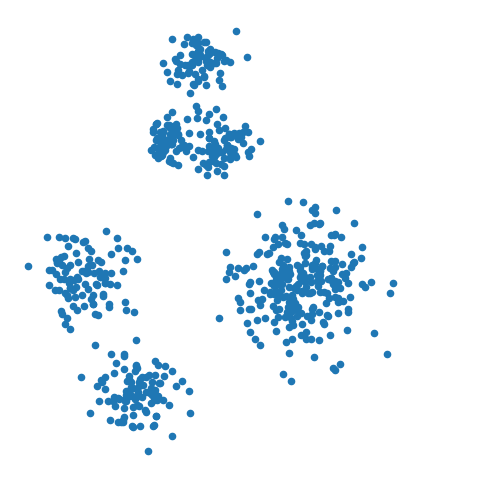

In [ ]:
#@title
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
from sklearn.cluster import KMeans
import seaborn as sns

X_rand, y_rand = sk_data.make_blobs(n_samples=[100, 100, 250, 70, 75, 80], centers = [[1, 2], [1.5, 1], [3, 2], [1.75, 3.25], [2, 4], [2.25, 3.25]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.2, .2, .3, .1, .15, .15], random_state = 0)
df_rand = pd.DataFrame(np.column_stack([X_rand[:, 0], X_rand[:, 1], y_rand]), columns = ['X', 'Y', 'label'])
df_rand = df_rand.astype({'label': 'int'})
df_rand['label2'] = [{0: 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3}[x] for x in df_rand['label']]
df_rand['label3'] = [{0: 0, 1: 0, 2: 1, 3: 2, 4: 2, 5: 2}[x] for x in df_rand['label']]

df_rand.plot('X', 'Y', kind = 'scatter', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

### Três grupos?

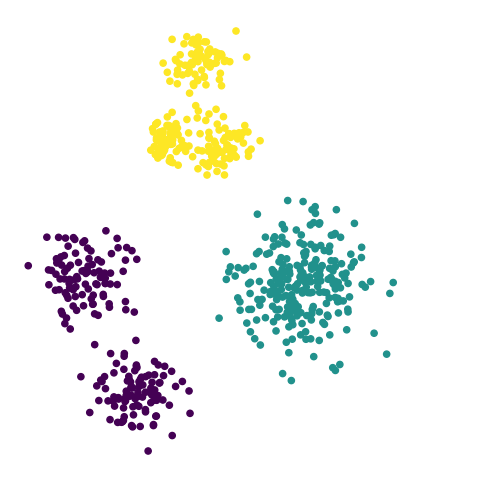

In [ ]:
#@title
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label3', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

### Quatro grupos?

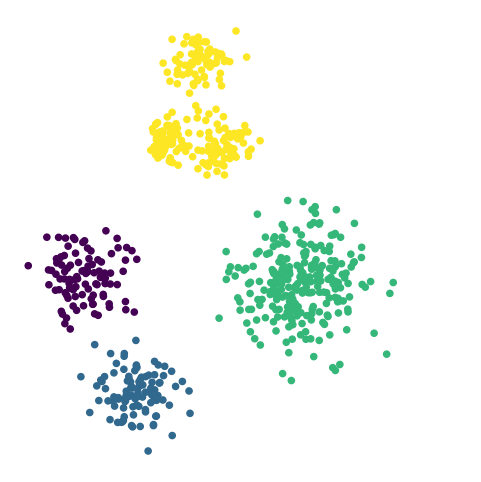

In [ ]:
#@title
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label2', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

### Seis grupos?

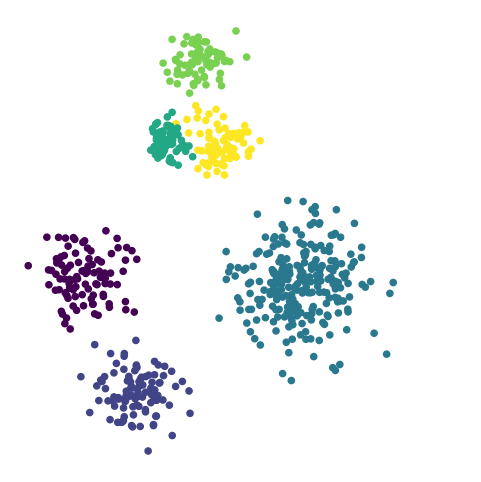

In [ ]:
#@title
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

### Discussão

Este conjunto de dados apresenta agrupamentos em **múltiplas escalas**

Para capturar a estrutura de grupos nestes dados, duas coisas são necessárias:
1. Capturar os diferentes grupos dependendo da escala
2. Capturar as relações de contingência (quais grupos estão contidos em quais grupos)

Essas observações motivam a noção de **agrupamento hierárquico**

No agrupamento hierárquico, nós nos afastamos da noção de particionamento dos dados (e.g., $k$-means) e procuramos uma estrutura mais complexa, que descreve relações de contingência entre os grupos.

## Exemplo: Visão geral

O agrupamento hierárquico produz um conjunto de grupos **aninhados** organizados em uma árvore.

O agrupamento hierárquico é visualizado por meio de um **dendrograma**
- Uma estrutura de árvore que representa as relações de contingência entre os grupos

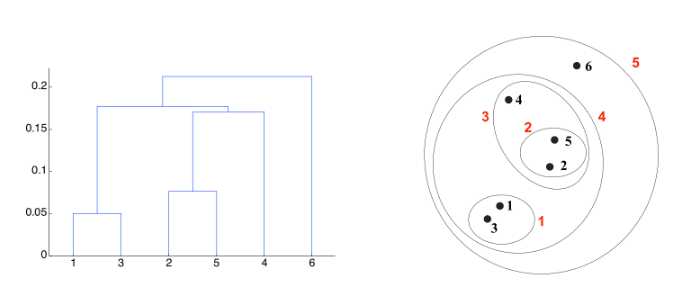

## Vantagens do agrupamento hierárquico

1. Um agrupamento hierárquico codifica vários **agrupamentos diferentes**. Por si só, um agrupamento hierárquico não decide o número correto de grupos.

  Um agrupamento específico é definido por um "corte" em algum nível do dendrograma.

  Assim, dado um dendrograma, pode-se obter qualquer número de grupos desejado (mas qual o correto?)

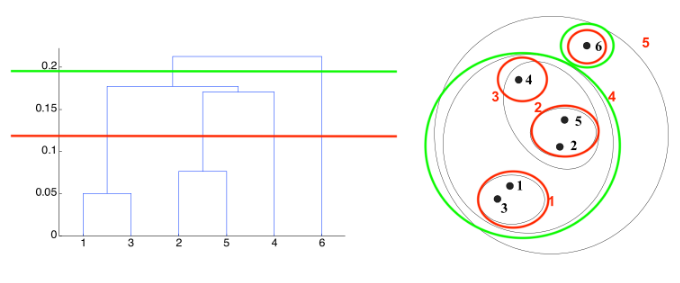

2. O dendrograma pode corresponder a uma estrutura informativa dos dados, por exemplo, uma taxonomia.

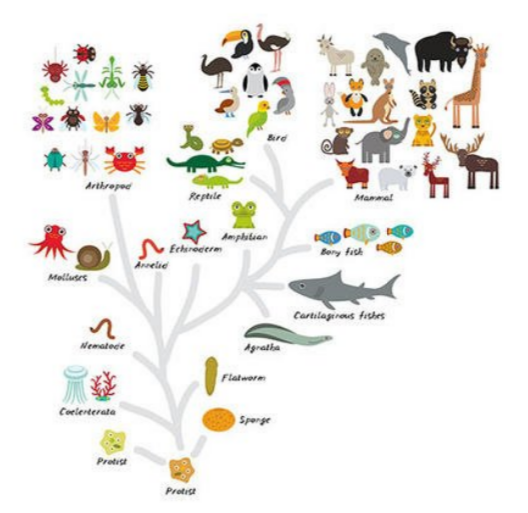

## No caso do exemplo acima

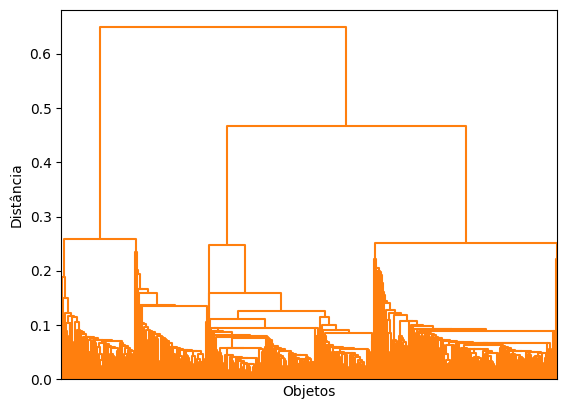

In [ ]:
#@title
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import itertools
X = df_rand[['X', 'Y']].values
Z = []
n, d = X.shape
for x, y in itertools.combinations(X, 2):
  Z.append(np.linalg.norm(x - y))
Z = hierarchy.linkage(Z)
hierarchy.dendrogram(Z, color_threshold=1)
plt.xticks([], [])
plt.ylabel('Distância')
plt.xlabel('Objetos');

# Algoritmos para agrupamento hierárquico

Há duas abordagens principais, sendo a primeira delas a mais comum nas implementações (e.g., ``scikit-learn``).

## Agrupamento por aglomeração

1. Cada ponto do conjunto de dados passa a ser um grupo
2. Repita até que haja apenas um grupo

  Aglomere os dois grupos mais próximos

## Agrupamento por divisão

1. Todos os pontos do conjunto de dados formam um único grupo
2. Repita até que haja $n$ grupos ($n$ é o número de objetos)

  Divida um grupo de forma que a distância entre os dois grupos resultantes seja máxima

## Como calcular a distância entre dois grupos?

Seja $D = \{\mathbf{x}_1, \dots \mathbf{x}_n\}$ o conjunto de objetos a ser agrupado, onde cada $\mathbf{x}_i \in \mathbb{R}^l$.

Considere que a função de dissimilaridade $d(\cdot, \cdot)$ esteja sendo utilizada para comparar pontos em $D$.

Sejam $C_i$ e $C_j$ dois subconjuntos (disjuntos e não vazios) do conjunto de dados, D.

**Como calcular a distância entre $C_i$ e $C_j$?**

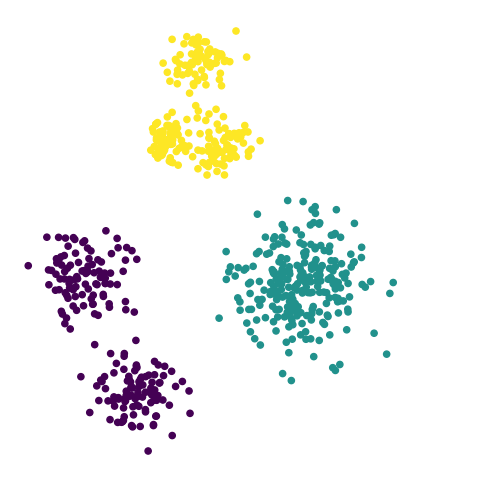

In [ ]:
#@title
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label3', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

### *Single-Linkage*

A distância entre dois grupos é a distância entre os dois pontos mais próximos que estão em grupos distintos.

$$d_{\text{single}}(C_i, C_j) = \min_{x\in C_i, y\in C_j}d(x, y)$$

### *Complete-Linkage*

A distância entre dois grupos é a distância entre os dois pontos mais distantes que estão em grupos distintos.

$$d_{\text{complete}}(C_i, C_j) = \max_{x\in C_i, y\in C_j}d(x, y)$$

### *Average-Linkage*

A distância entre dois grupos é a distância média entre todos os pares de pontos (cada ponto do par pertencente a grupos distintos).

$$d_{\text{average}}(C_i, C_j) = \frac{1}{|C_i|\cdot|C_j|}\sum_{x\in C_i, y\in C_j}d(x, y)$$

### Ilustrando a diferença entre as três definições acima

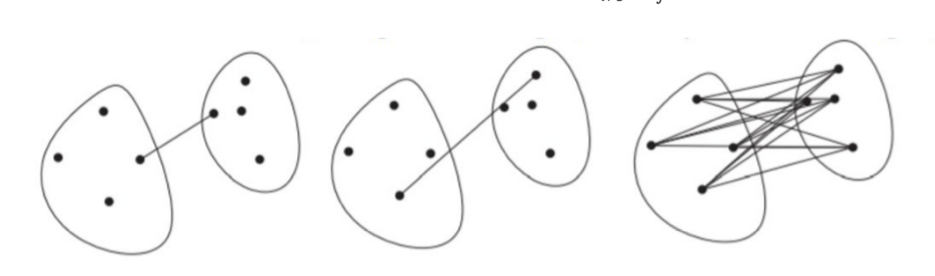

### Comparando as três definições

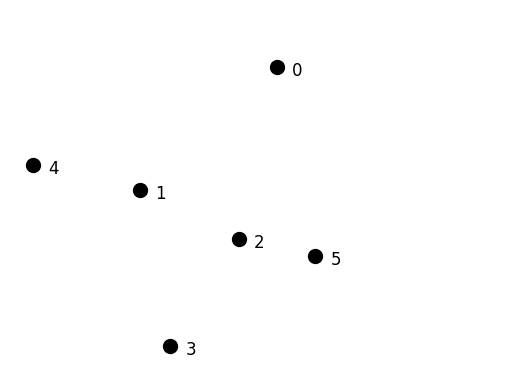

In [ ]:
#@title
pt_x = [0.4, 0.22, 0.35, 0.26, 0.08, 0.45]
pt_y = [0.53, 0.38, 0.32, 0.19, 0.41, 0.30]
plt.plot(pt_x, pt_y, 'o', markersize = 10, color = 'k')
plt.ylim([.15, .60])
plt.xlim([0.05, 0.70])
for i in range(6):
    plt.annotate(f'{i}', (pt_x[i]+0.02, pt_y[i]-0.01), fontsize = 12)
plt.axis('off');

In [ ]:
#@title
X = np.array([pt_x, pt_y]).T
from scipy.spatial import distance_matrix
labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5']
D = pd.DataFrame(distance_matrix(X, X), index = labels, columns = labels)
D.style.format('{:.2f}')

,p0,p1,p2,p3,p4,p5
p0,0.00,0.23,0.22,0.37,0.34,0.24
p1,0.23,0.00,0.14,0.19,0.14,0.24
p2,0.22,0.14,0.00,0.16,0.28,0.10
p3,0.37,0.19,0.16,0.00,0.28,0.22
p4,0.34,0.14,0.28,0.28,0.00,0.39
p5,0.24,0.24,0.10,0.22,0.39,0.00


#### Single-Linkage

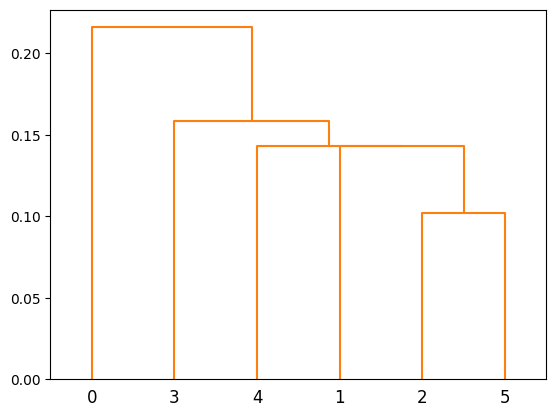

In [ ]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
Z = hierarchy.linkage(X, method='single')
hierarchy.dendrogram(Z, color_threshold=0.3);

#### Complete-Linkage

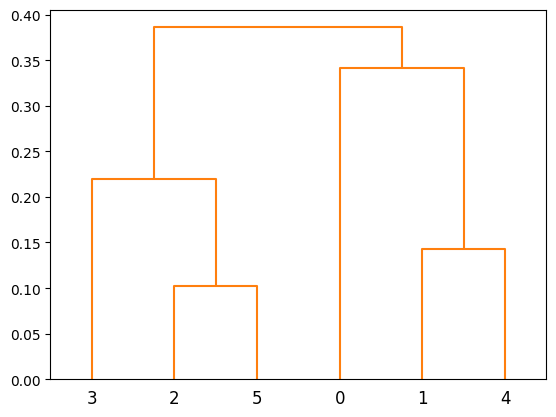

In [ ]:
Z = hierarchy.linkage(X, method='complete')
hierarchy.dendrogram(Z, color_threshold=1);

#### Average-Linkage

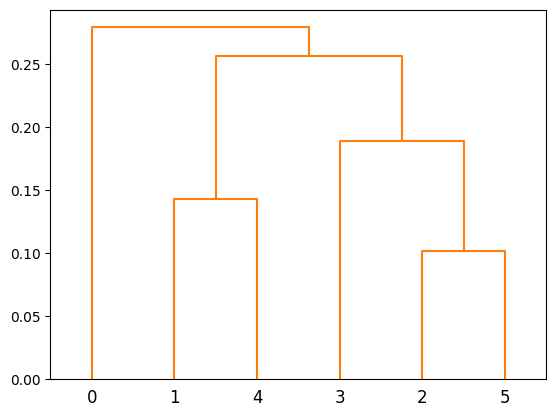

In [ ]:
Z = hierarchy.linkage(X, method='average')
hierarchy.dendrogram(Z, color_threshold=1);

### Vantagens e desvantagens de cada definição

#### Single-Linkage

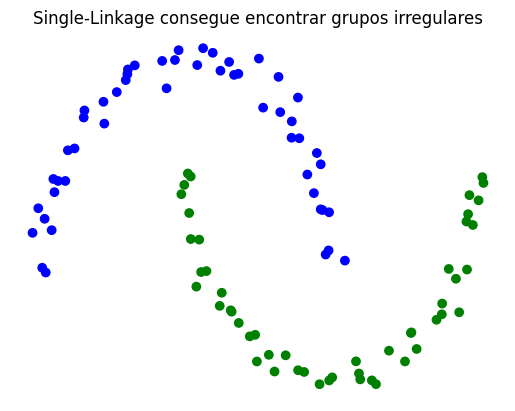

In [ ]:
#@title
X_moon_05, y_moon_05 = sk_data.make_moons(random_state = 0, noise = 0.05)
Z = hierarchy.linkage(X_moon_05, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_05[:,0], X_moon_05[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage consegue encontrar grupos irregulares')
plt.axis('off');

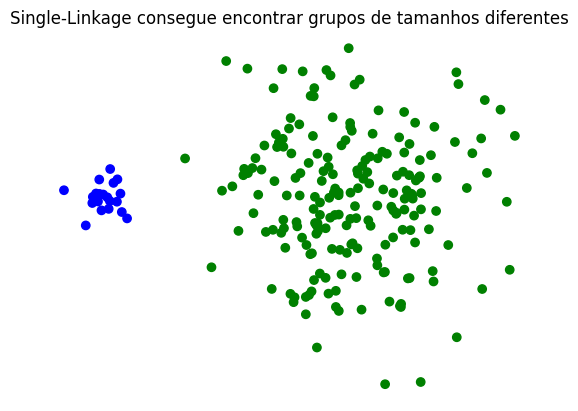

In [ ]:
#@title
X_rand_lo, y_rand_lo = sk_data.make_blobs(n_samples=[20, 200], centers = [[1, 1], [3, 1]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.1, .5], random_state = 0)
Z = hierarchy.linkage(X_rand_lo, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_lo[:,0], X_rand_lo[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage consegue encontrar grupos de tamanhos diferentes')
plt.axis('off');

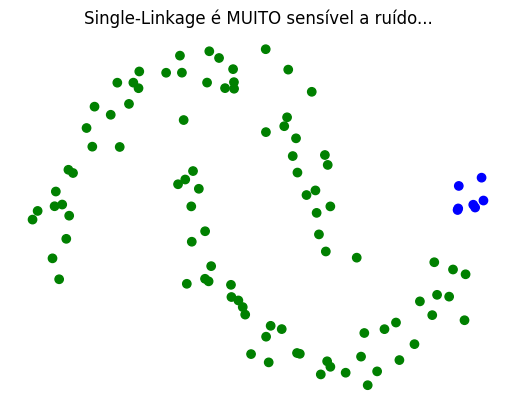

In [ ]:
#@title
X_moon_10, y_moon_10 = sk_data.make_moons(random_state = 0, noise = 0.1)
Z = hierarchy.linkage(X_moon_10, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage é MUITO sensível a ruído...')
plt.axis('off');


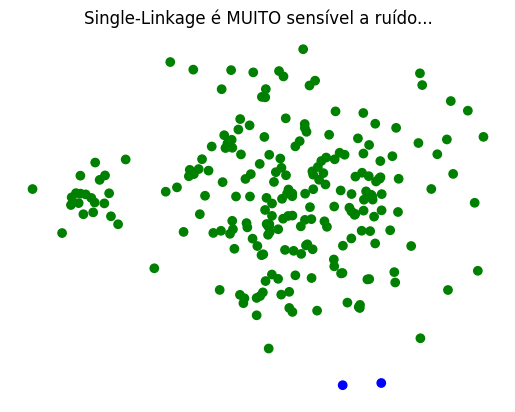

In [ ]:
#@title
X_rand_hi, y_rand_hi = sk_data.make_blobs(n_samples=[20, 200], centers = [[1, 1], [3, 1]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.15, .6], random_state = 0)
Z = hierarchy.linkage(X_rand_hi, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.title('Single-Linkage é MUITO sensível a ruído...')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.axis('off');


#### Complete-Linkage

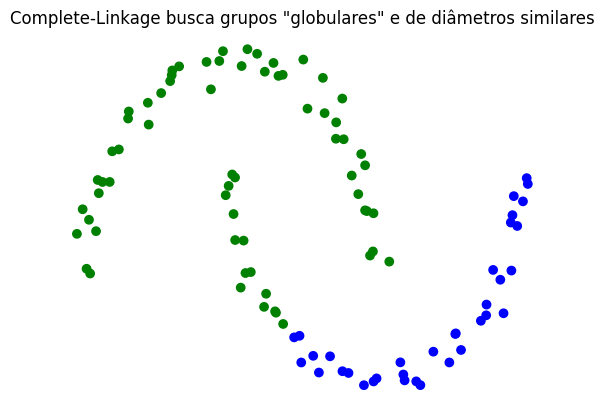

In [ ]:
#@title
X_moon_05, y_moon_05 = sk_data.make_moons(random_state = 0, noise = 0.05)
Z = hierarchy.linkage(X_moon_05, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_05[:,0], X_moon_05[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage busca grupos "globulares" e de diâmetros similares')
plt.axis('off');

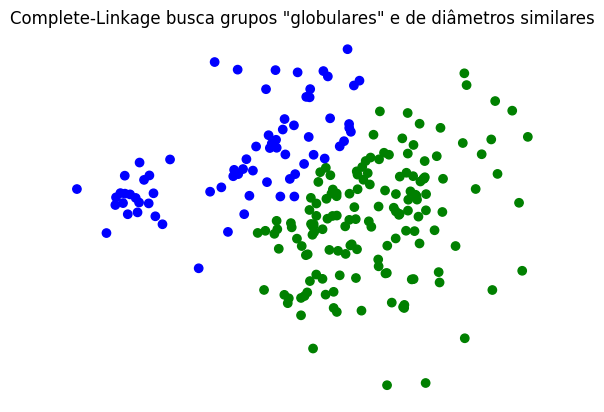

In [ ]:
#@title
Z = hierarchy.linkage(X_rand_hi, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage busca grupos "globulares" e de diâmetros similares')
plt.axis('off');

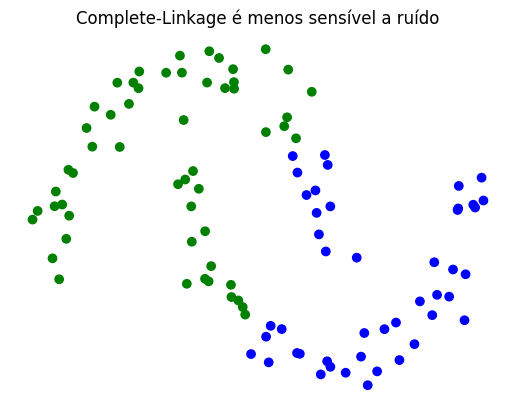

In [ ]:
#@title
Z = hierarchy.linkage(X_moon_10, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage é menos sensível a ruído')
plt.axis('off');

#### Average-Linkage

É uma relação de compromisso entre *single-linkage* e *complete-linkage*.

É menos sensível a ruído, mas tem uma tendência a encontrar grupos "elipticos".

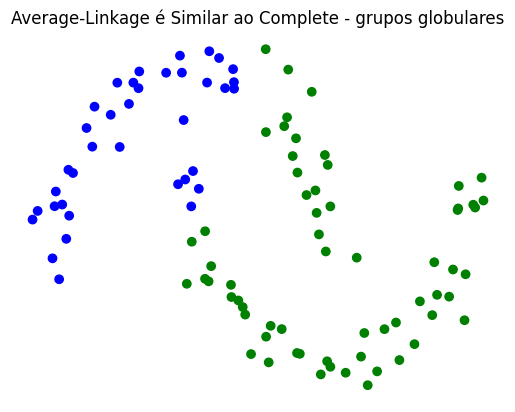

In [ ]:
#@title
Z = hierarchy.linkage(X_moon_10, method='average')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Average-Linkage é Similar ao Complete - grupos globulares')
plt.axis('off');

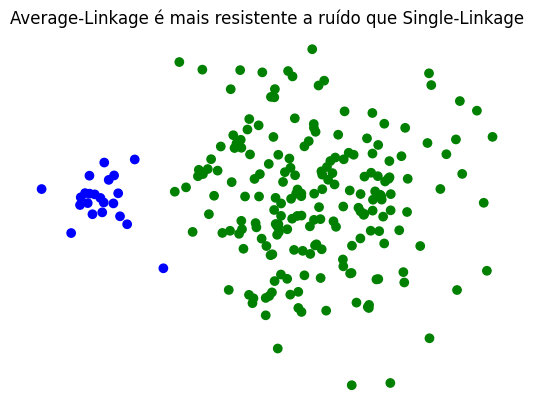

In [ ]:
#@title
Z = hierarchy.linkage(X_rand_hi, method='average')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Average-Linkage é mais resistente a ruído que Single-Linkage')
plt.axis('off');

### Distância de *Ward*

A ideia dessa distância é fazer a pergunta **"se combinarmos esses dois grupos, quanto o agrupamento melhoraria?"**

Usa-se um critério **parecido** com o $k$-means.

Considere $C_i$ e $C_j$ dois grupos candidatos a serem unidos. Defina:
- $C_{i,j} = C_i \cup C_j$
- $r_i$, o centroide de $C_i$
- $r_j$, o centroide de $C_j$
- $r_{i,j}$, o centroide de $C_{i,j}$.

Assim,

$$d_{\text{Ward}}(C_i, C_j) = \sum_{x\in C_{i,j}}\Vert x - r_{i,j}\Vert^2_2 - \sum_{x\in C_i}\Vert x - r_i\Vert^2_2 - \sum_{x\in C_j}\Vert x - r_j\Vert^2_2.$$

Tende a gerar resultados interessantes na prática.

### Agrupamento Hierárquico na ``scikit-learn``

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


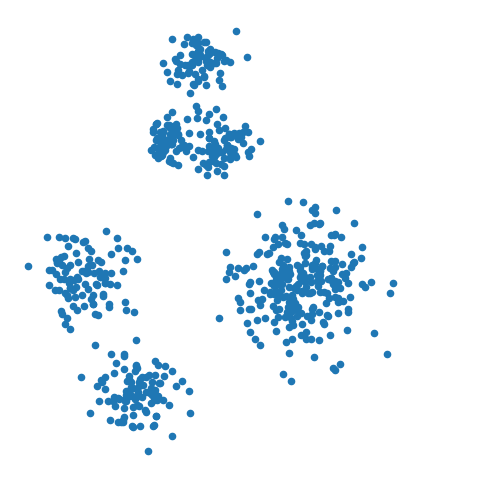

In [ ]:
#@title
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
from sklearn.cluster import KMeans
import seaborn as sns

X_rand, y_rand = sk_data.make_blobs(n_samples=[100, 100, 250, 70, 75, 80], centers = [[1, 2], [1.5, 1], [3, 2], [1.75, 3.25], [2, 4], [2.25, 3.25]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.2, .2, .3, .1, .15, .15], random_state = 0)
df_rand = pd.DataFrame(np.column_stack([X_rand[:, 0], X_rand[:, 1], y_rand]), columns = ['X', 'Y', 'label'])

df_rand.plot('X', 'Y', kind = 'scatter', colormap='viridis',
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');
X = df_rand[['X', 'Y']].values

In [ ]:
from sklearn.cluster import AgglomerativeClustering

m = AgglomerativeClustering(6, linkage = 'average')
m.fit(X);

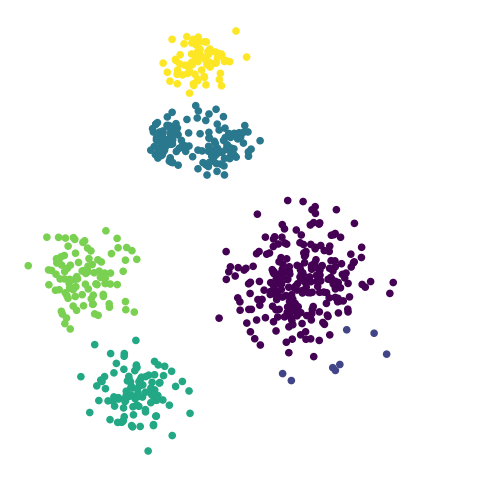

In [ ]:
#@title
df_rand.plot('X', 'Y', kind = 'scatter', colormap='viridis', c = m.labels_,
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');
plt.axis('square')
plt.axis('off');

### Comparando todos os algoritmos no exemplo inicial...

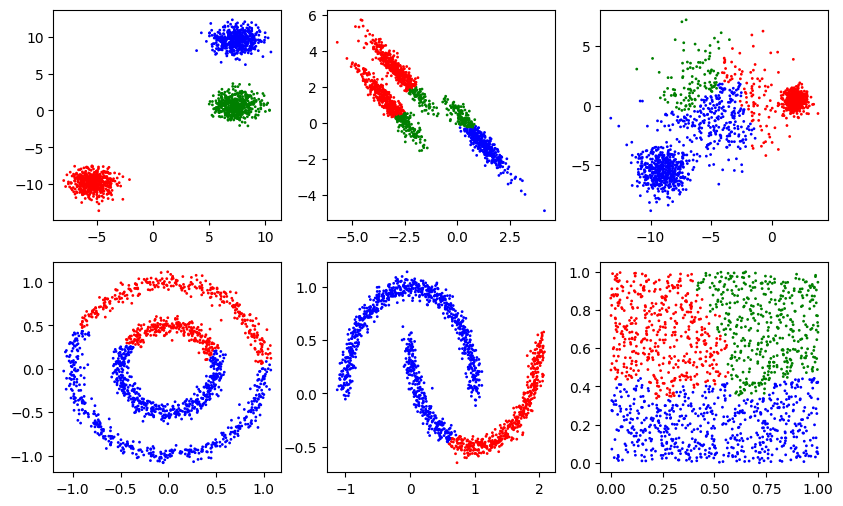

In [ ]:
colors = exec_model(dataset, cluster.AgglomerativeClustering, (n_groups, 'complete')) # single, complete, average, ward
plot_figure_example(colors)

### Complexidade

Ao agrupar $n$ pontos (com as distâncias pré-computadas), há algoritmos de agrupamento aglomerativo com complexidade de tempo $O(n^2\log(n))$.



### Mais um exemplo -- *Clustermap*

Considere o conjunto de dados `wine`, que já utilizamos na Aula de PCA.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

X, y = load_wine(return_X_y=True, as_frame = True);
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True)

Z = scaler.fit_transform(X)

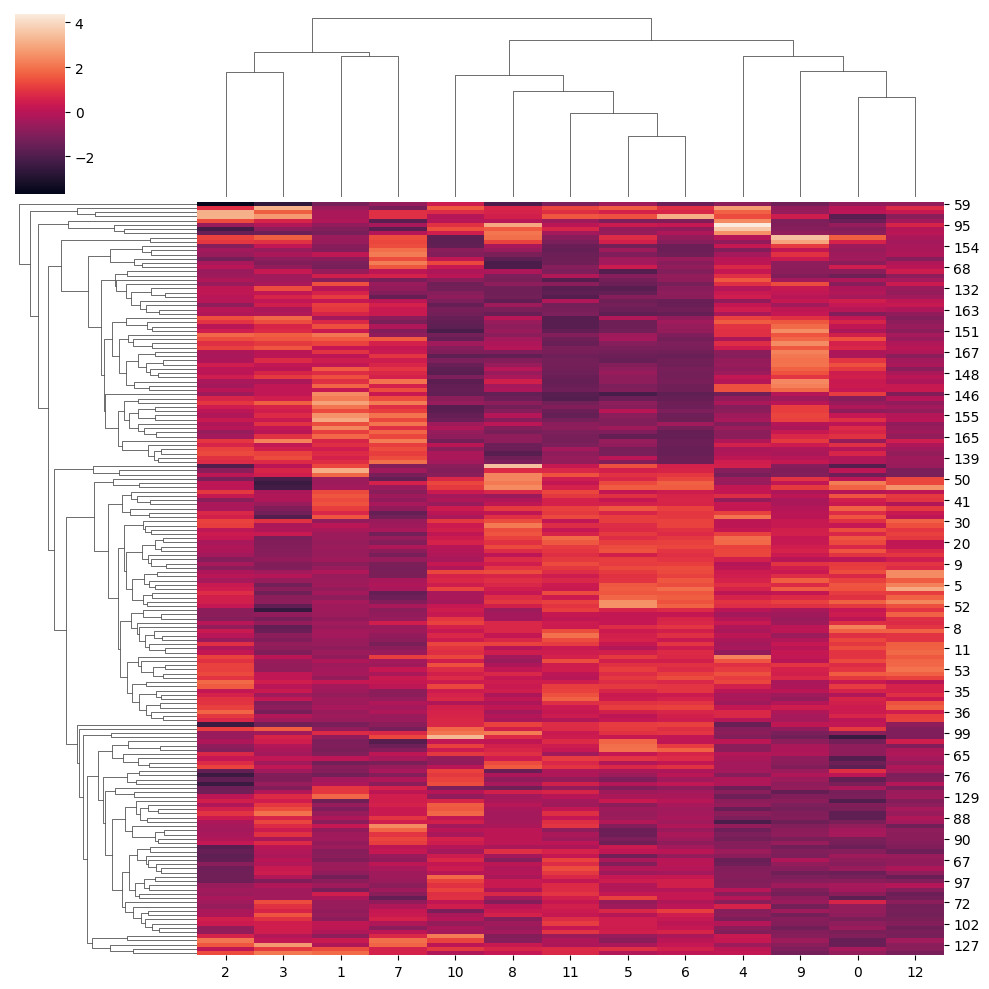

In [ ]:
import seaborn as sns

sns.clustermap(Z);

# What is next?

- Como avaliar se um agrupamento é bom?